In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# 1. Plot pearson r2 of different models

## 1.1 Elastic net

### 1.1.1 Compare pearson r2 of train vs test
To show over fitting and find a better threshold

Text(0.5, 1.0, 'Model performance of PC(18:0_20:4)')

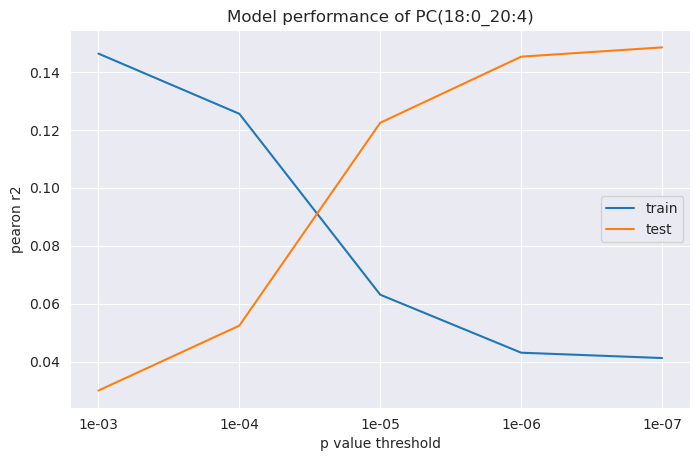

In [4]:
# Plot train and test performance of a single lipid
# PC(18:0_20:4) has the highest pearson r2 in pval 1e-07
# plot performance of train and test of this lipid
threshold = '1e-07'
lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]

reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
r2_train, r2_test, r2_train_maf, r2_test_maf = [], [], [], []
lipid = 'PC(18:0_20:4)'
for threshold in lst_threshold:
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t')
    r2_train.append(df_train[df_train['Lipid']==lipid]['pearson_r2'].values[0])
    r2_test.append(df_test[df_test['Lipid']==lipid]['pearson_r2'].values[0])
    
    # Do the same for MAF fitlered result
    # MAF file seems to have some problem. Values are the same as no MAF result
    # fn_train_maf = f'merged_h2_r2_train_species_pval_{threshold}_maf_0.01.txt'
    # fn_test_maf = f'merged_h2_r2_test_species_pval_{threshold}_maf_0.01.txt'
    # df_train_maf = pd.read_csv(os.path.join(reuslt_dir, fn_train_maf), sep='\t')
    # df_test_maf = pd.read_csv(os.path.join(reuslt_dir, fn_test_maf), sep='\t')
    # r2_train_maf.append(df_train_maf[df_train_maf['Lipid']==lipid]['pearson_r2'].values[0])
    # r2_test_maf.append(df_test_maf[df_test_maf['Lipid']==lipid]['pearson_r2'].values[0])

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.plot(r2_train, label='train')
ax.plot(r2_test, label='test')
ax.legend()
ax.set_xticks(range(5))
ax.set_xticklabels(lst_threshold)
ax.set_xlabel('p value threshold')
ax.set_ylabel('pearon r2')
ax.set_title(f'Model performance of {lipid}')

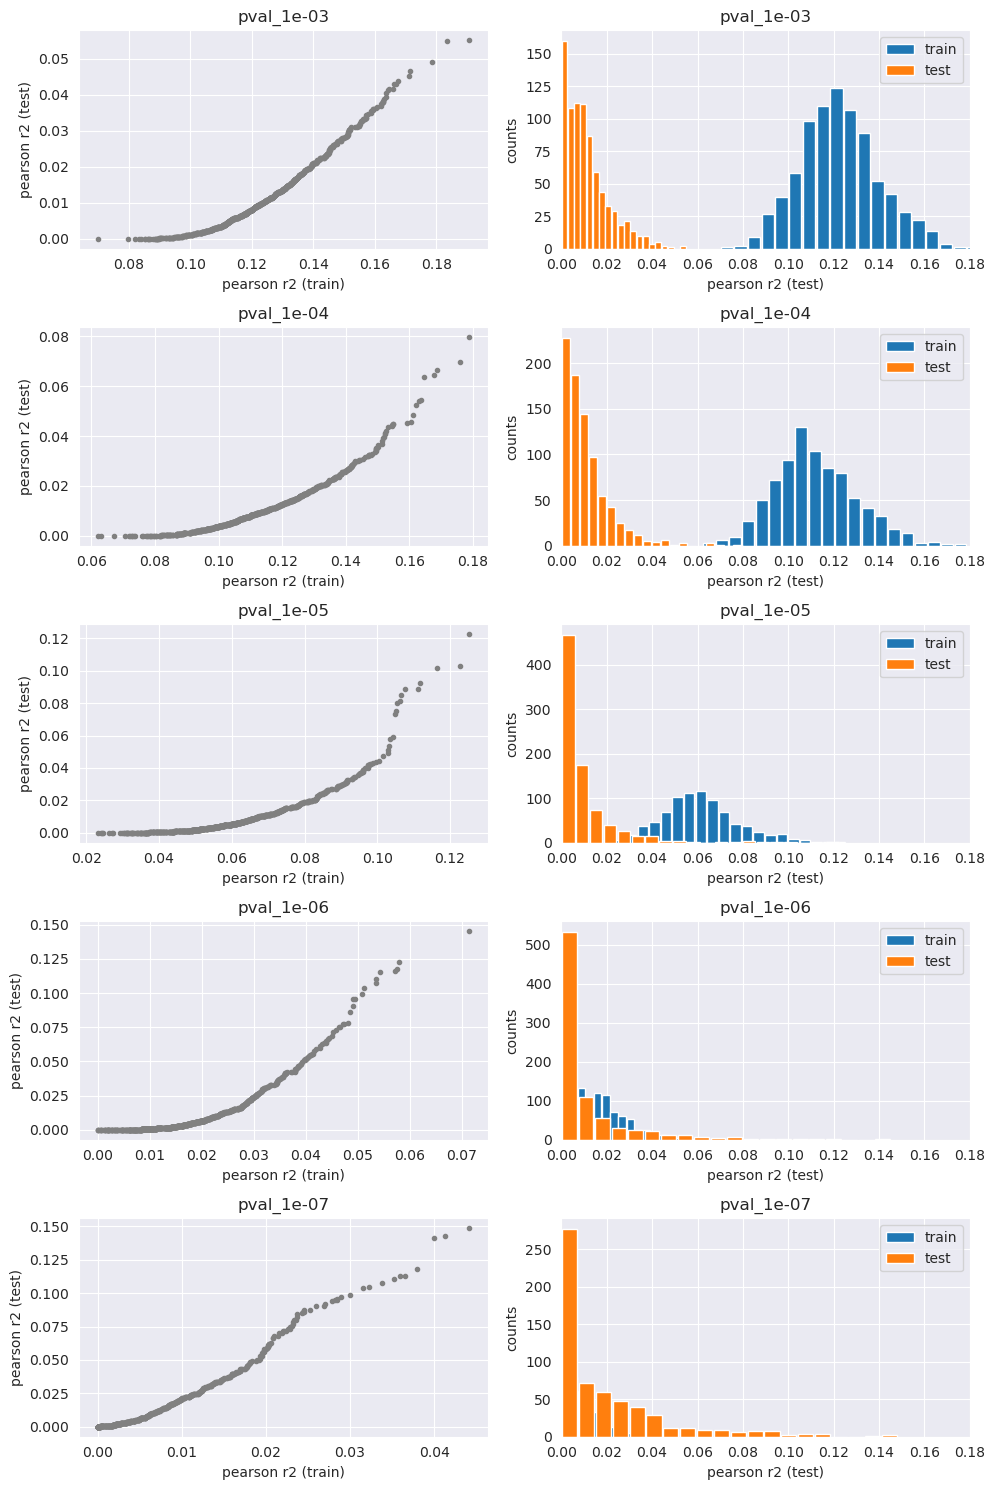

In [5]:

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
    
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,15), dpi=100)
r = 0 # Row
for threshold in lst_threshold: 
    reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    ax[r,0].plot(df_train['pearson_r2'], df_test['pearson_r2'], ls='', marker='.', c='grey')
    ax[r,0].set_xlabel('pearson r2 (train)')
    ax[r,0].set_ylabel('pearson r2 (test)')
    ax[r,0].set_title(f'pval_{threshold}')
    
    ax[r,1].hist(df_train['pearson_r2'], bins=20, rwidth=0.9, label='train')
    ax[r,1].hist(df_test['pearson_r2'], bins=20, rwidth=0.9, label='test')
    ax[r,1].set_xlabel('pearson r2 (test)')
    ax[r,1].set_ylabel('counts')
    ax[r,1].set_title(f'pval_{threshold}')
    ax[r,1].set_xlim(0, 0.18)
    ax[r,1].legend()
    r += 1
fig.tight_layout()
# fig.suptitle(f'pval_{threshold}')

### 1.1.2 Compare r2 of different pval threshold models

Text(0.5, 0, 'p value threshold')

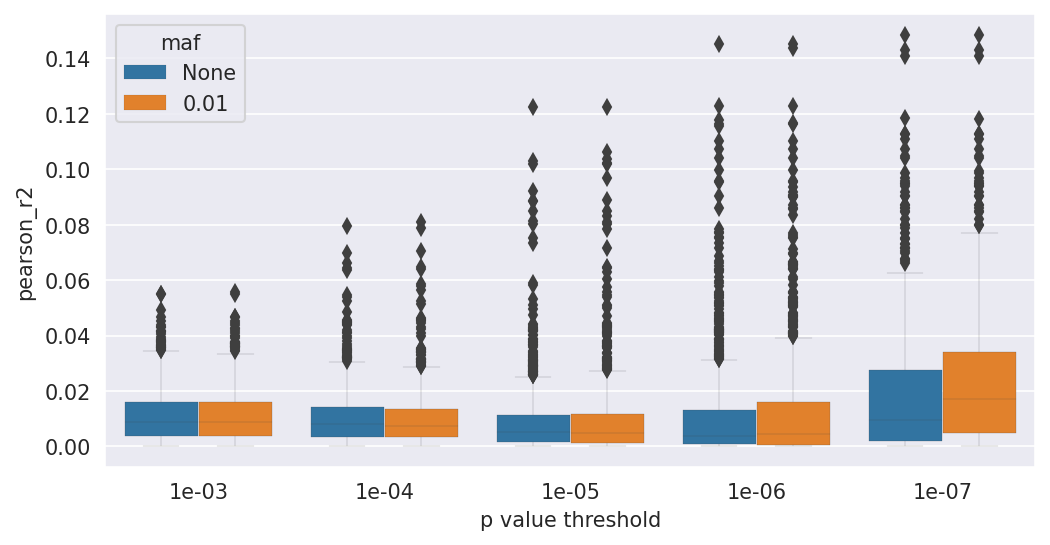

In [6]:
# Compare model performance with different SNP filtering criteria
lip_type = 'species'

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
# Load h2 and pearson R2
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
lst_reuslt = []
for threshold in lst_threshold:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold
    df['maf'] = 'None'
    # display(df.head())
    lst_reuslt.append(df)
for threshold in lst_threshold_with_maf:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold.split('_maf_0.01')[0]
    df['maf'] = '0.01'
    # display(df.head())
    lst_reuslt.append(df)

df_all = pd.concat(lst_reuslt) # Merge all results
sns.boxplot(data=df_all, x='threshold', y='pearson_r2', hue='maf',
            linewidth=0.1, ax=ax)
ax.set_xlabel('p value threshold')

## 1.2 AdaBoost

### 1.2.1 Get pearson r2 of test run result


In [2]:
# Load AdaBoost result
result_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/AdaBoost/species/pval_1e-05'
lip_type='species'
lst_lipid, lst_r2, c = [], [], 0
for fn in os.listdir(result_dir):
    if fn.endswith('.log'):
        # Extract pearson r2 from log files
        # Already applied model on test set during training
        lipid = fn.split('.2024')[0]
        lst_lipid.append(lipid)
        with open(os.path.join(result_dir, fn)) as fh:
            for line in fh:
                if 'Pearson r2' in line:
                    r2 = line.strip().split(': ')[-1]
                    lst_r2.append(r2)
        c+=1
        print(f'\r# Processed {c}', end='', flush=True)
df_adb_r2 = pd.DataFrame({'Lipid_name':lst_lipid, 'pearson_r2':lst_r2})
df_adb_r2['pearson_r2'] = df_adb_r2['pearson_r2'].astype('float')

# Load elastic net result
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
threshold = '1e-05'
resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
# Reorder lipids
# Sort by heritability
df_elastic_net_r2 = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='h2')
df_adb_r2 = df_adb_r2.set_index(keys='Lipid_name').reindex(labels=df_elastic_net_r2['Lipid_name']).reset_index()

print('\n# Number of lipids pass in AdaBoost r2>0.05:',len(df_adb_r2[df_adb_r2['pearson_r2']>=0.05]))
print('# Number of lipids pass in Elastic net r2>0.05:',len(df_elastic_net_r2[df_elastic_net_r2['pearson_r2']>=0.05]))

# Processed 830
# Number of lipids pass in AdaBoost r2>0.05: 70
# Number of lipids pass in Elastic net r2>0.05: 15


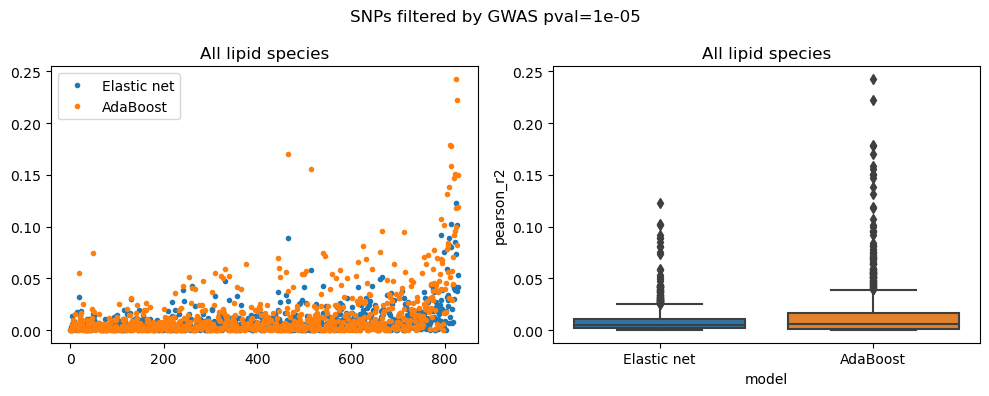

In [5]:
# Plot AdaBoost and Elastic net
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), dpi=100)
ax[0].plot(df_elastic_net_r2['pearson_r2'].values, ls='', marker='.', label='Elastic net')
ax[0].plot(df_adb_r2['pearson_r2'].astype('float'), ls='', marker='.', label='AdaBoost')
ax[0].legend()
ax[0].set_title('All lipid species')
df_adb_r2['model']='AdaBoost'
df_elastic_net_r2['model'] = 'Elastic net'
df_merged = pd.concat([df_elastic_net_r2[['Lipid_name', 'pearson_r2', 'model']], df_adb_r2])
df_merged['pearson_r2'] = df_merged['pearson_r2'].astype('float')
sns.boxplot(data=df_merged, x="model", y="pearson_r2", ax=ax[1])
ax[1].set_title('All lipid species')
fig.suptitle('SNPs filtered by GWAS pval=1e-05')
fig.tight_layout()

## 1.3 Gradient boosting

In [3]:
# Get person r2 from log files
gb_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/GradientBoosting/species'
lst_lipid, lst_gb_r2, c = [], [], 0
for fn in os.listdir(gb_dir):
    if fn.endswith('.log'):
        lipid = fn.split('.2024')[0]
        lst_lipid.append(lipid)
        with open(os.path.join(gb_dir, fn)) as fh:
            line = fh.readline().strip()
            while line != '':
                if 'Pearson r2 on test' in line:
                    pearson_r2 = float(line.split('Pearson r2 on test: ')[-1])
                    lst_gb_r2.append(pearson_r2)
                    break
                line = fh.readline().strip()
            c+=1
            print(f'\rProcessed: {c}', end='', flush=True)

df_gb_r2 = pd.DataFrame({'Lipid_name':lst_lipid, 'pearson_r2':lst_gb_r2})
df_gb_r2['pearson_r2'] = df_gb_r2['pearson_r2'].astype('float')
df_gb_r2.head()

Processed: 830

,Lipid_name,pearson_r2
0,PC-42:5-_-a-,0.0073
1,LPC-18:1-_[sn1],0.0077
2,FA-16:1-,0.0024
3,Cer-d19:1-26:0-,0.0348
4,S1P-d18:2-,0.0012


In [4]:
# Merge pearson r2 of different models and heritability
# Load elastic net result
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
threshold = '1e-05'
resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
# Reorder lipids
# Sort by heritability
df_elastic_net_r2 = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t')[['Lipid_name', 'pearson_r2', 'h2']].rename(columns={'pearson_r2':'pearson_r2_elastic_net'})



df_boosting_result_h2_merged = df_adb_r2[['Lipid_name',
                                          'pearson_r2']].merge(df_gb_r2,
                                                               on='Lipid_name',
                                                               suffixes=('_adaB',
                                                                         '_gradient_boosting')).merge(df_elastic_net_r2,
                                                                                                      on='Lipid_name').sort_values(by='h2')

# output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.txt'
# df_boosting_result_h2_merged.to_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
#                                     sep='\t', index=False)
df_boosting_result_h2_merged.columns=['Lipid_name', 'AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print('# Number of lipids with pearson r2>0.05:')
r2_threshold = 0.05
print('# - Elastic net:', (df_boosting_result_h2_merged['Elastic net']>r2_threshold).sum())
print('# - AdaBoost:',(df_boosting_result_h2_merged['AdaBoost']>r2_threshold).sum())
print('# - Gradient boosting:', (df_boosting_result_h2_merged['Gradient boosting']>r2_threshold).sum())
df_boosting_result_h2_merged.head()


# Number of lipids with pearson r2>0.05:
# - Elastic net: 15
# - AdaBoost: 70
# - Gradient boosting: 93


,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
0,CE-18:2-,0.0005,0.0001,0.000497,0.000001
137,TG-49:1-_[SIM],0.0091,0.0018,0.003947,0.000001
138,DG-17:0_18:1-,0.0077,0.0108,0.002815,0.000001
139,TG-50:4-_[NL-18:3],0.0030,0.0160,0.010316,0.000001
140,TG-53:2-_[NL-18:1],0.0045,0.0064,0.004278,0.000001


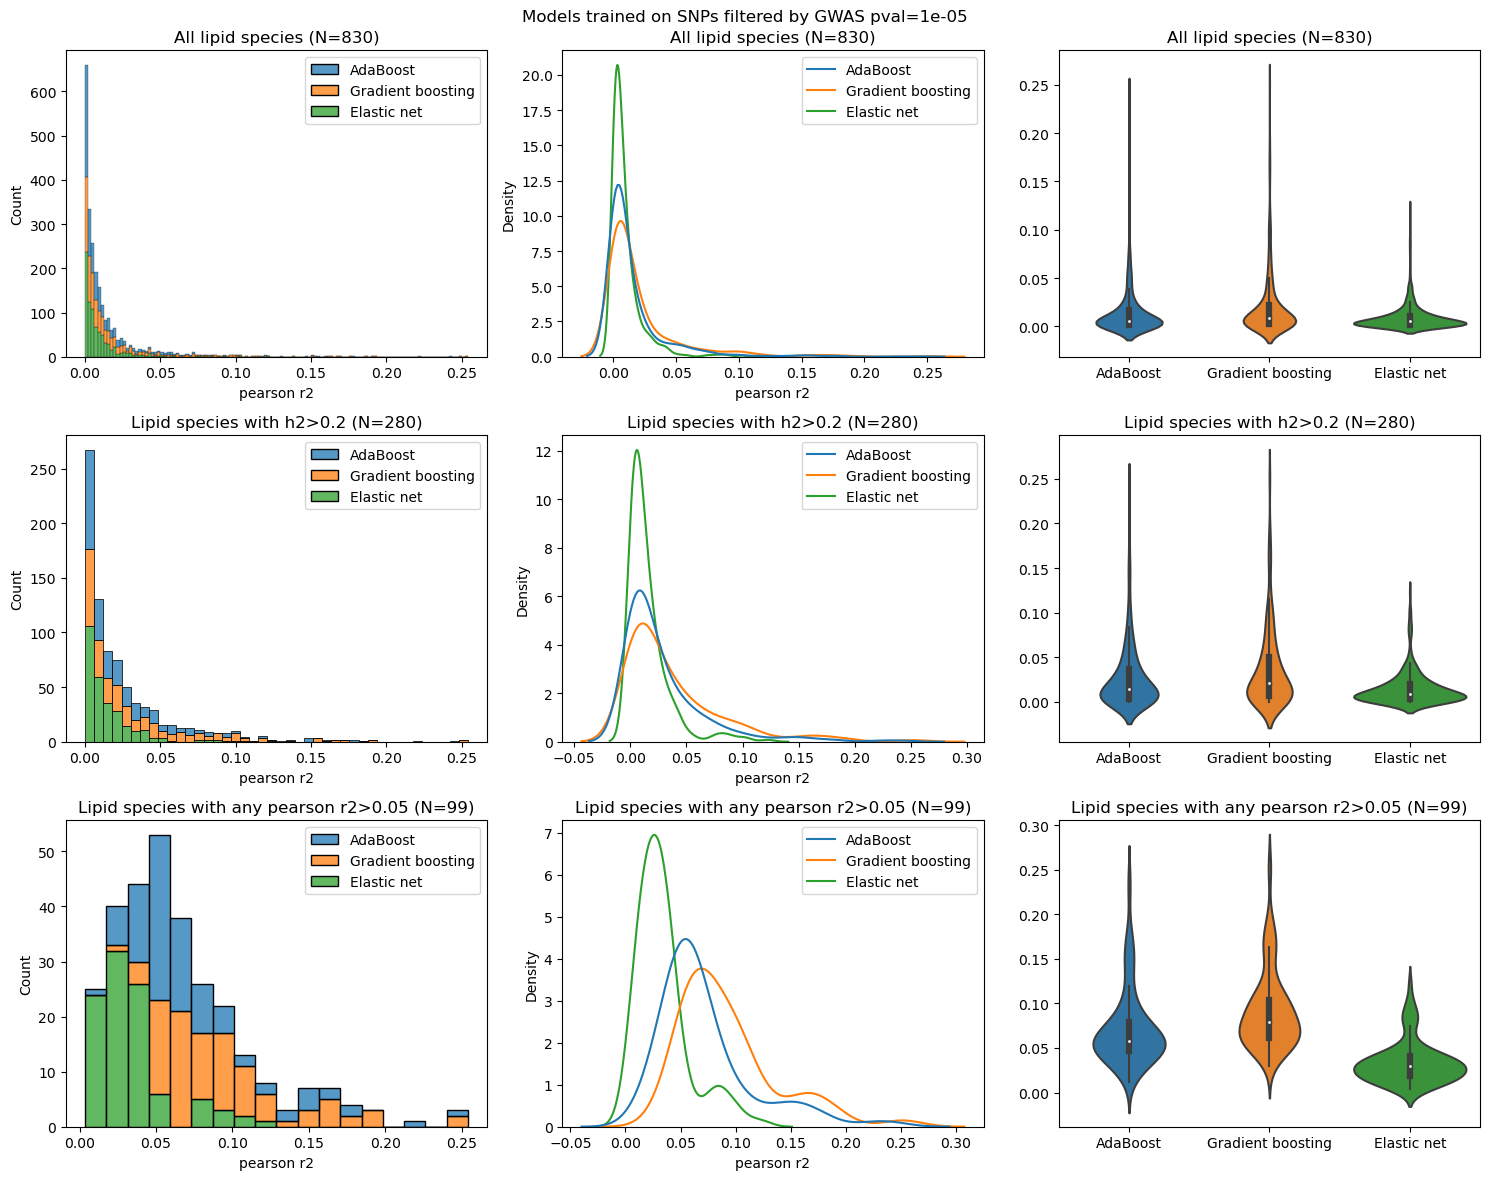

In [8]:
# Plot AdaBoost, gradient boosting and Elastic net
# df_boosting_result_h2_merged.columns=['Lipid_name', 'AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), dpi=100)

# sns.boxplot(data=df_merged, x="model", y="pearson_r2", ax=ax[0, 1])
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
sns.histplot(data=df_boosting_result_h2_merged[cols_plot], multiple='stack', ax=ax[0,0])
ax[0,0].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')
ax[0,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[cols_plot], ax=ax[0,1])
ax[0,1].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')
ax[0,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[cols_plot], ax=ax[0, 2])
ax[0,2].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')

# ######## Filter by heritability h2>0.2 ########
h2_threshold = 0.2
h2_mask = df_boosting_result_h2_merged['h2']>h2_threshold
sns.histplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], multiple='stack', ax=ax[1,0])
ax[1,0].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')
ax[1,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], ax=ax[1,1])
ax[1,1].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')
ax[1,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], ax=ax[1, 2])
ax[1,2].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')


# ######## Filter by pearson r2>0.05 (combined of ada, gradient and eln) ########
r2_threshold=0.05
r2_mask = (df_boosting_result_h2_merged['AdaBoost']>r2_threshold) | (df_boosting_result_h2_merged['Gradient boosting']>r2_threshold) | (df_boosting_result_h2_merged['Elastic net']>r2_threshold)
sns.histplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], multiple='stack', ax=ax[2,0])
ax[2,0].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')
ax[2,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], ax=ax[2,1])
ax[2,1].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')
ax[2,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], ax=ax[2, 2])
ax[2,2].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')

fig.suptitle('Models trained on SNPs filtered by GWAS pval=1e-05')
fig.tight_layout()

# 2. Cluster heatmaps

In [2]:
# Load data saved above
output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.txt'
df_boosting_result_h2_merged = pd.read_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
                                           sep='\t').rename(columns={'pearson_r2_adaB':'AdaBoost',
                                                                     'pearson_r2_gradient_boosting':'Gradient boosting',
                                                                     'pearson_r2_elastic_net':'Elastic net'})
df_boosting_result_h2_merged.head()

,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
0,CE-18:2-,0.0005,0.0001,0.000497,0.000001
1,TG-49:1-_[SIM],0.0091,0.0018,0.003947,0.000001
2,DG-17:0_18:1-,0.0077,0.0108,0.002815,0.000001
3,TG-50:4-_[NL-18:3],0.0030,0.0160,0.010316,0.000001
4,TG-53:2-_[NL-18:1],0.0045,0.0064,0.004278,0.000001


### 2.1 Cluster heatmap with/without h2 or r2 filter

Scaled pearson r2 of all lipid species (N=830)


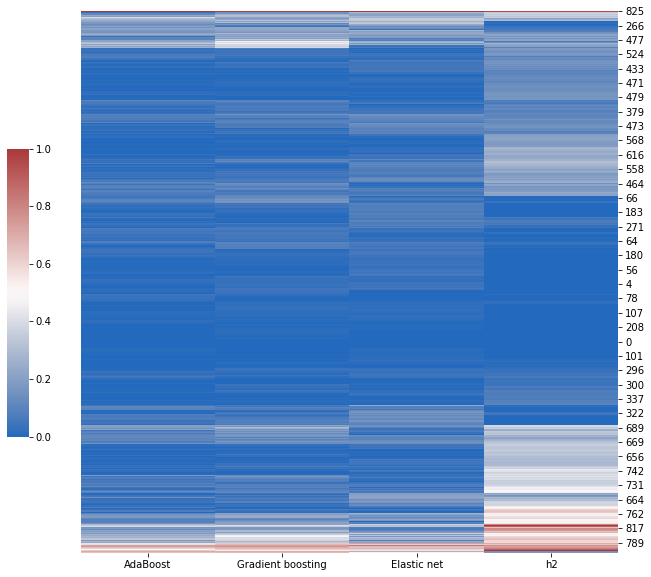

In [7]:
# Cluster pearson r2, no filter
df_for_plot = df_boosting_result_h2_merged.copy()
df_for_plot['h2_scaled'] = df_for_plot['h2']*0.25 # Need to shrink h2 so otherwise h2 is too large compare to r2
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
print(f'Scaled pearson r2 of all lipid species (N={len(df_for_plot)})')
cg = sns.clustermap(data=df_for_plot[cols_plot],
                    col_cluster=False,cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

Scaled pearson r2, lipid species with h2>0.2 (N=280)


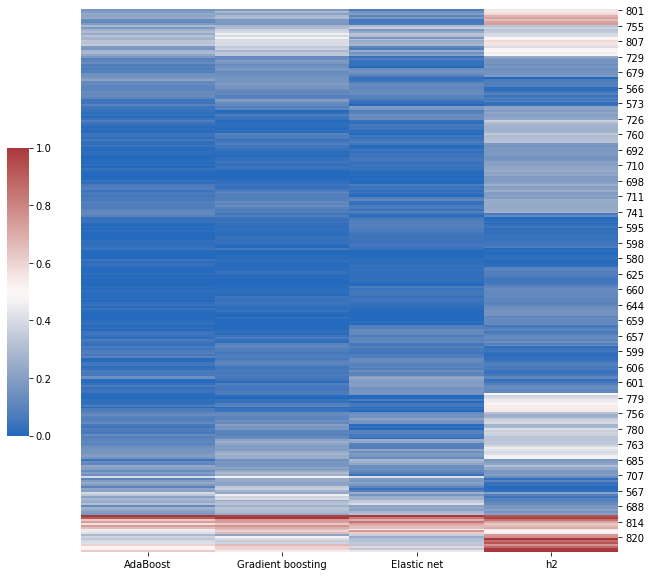

In [11]:
# Cluster pearson r2, filter by h2
h2_threshold = 0.2
h2_mask = df_for_plot['h2']>h2_threshold
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
print(f'Scaled pearson r2, lipid species with h2>{h2_threshold} (N={len(df_for_plot[h2_mask])})')
cg = sns.clustermap(data=df_for_plot[h2_mask][cols_plot],
                    col_cluster=False, cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)


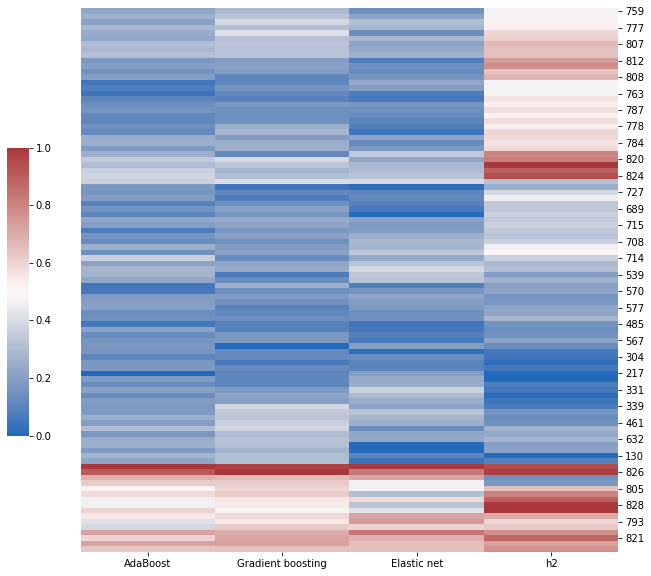

In [ ]:
# Cluster pearson r2
r2_threshold = 0.05
r2_mask = (df_for_plot['AdaBoost']>r2_threshold) | (df_for_plot['Gradient boosting']>r2_threshold) | (df_for_plot['Elastic net']>r2_threshold)
print(f'Scaled pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot],
                    col_cluster=False,cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

print(f'Raw pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot],
                    col_cluster=False,cmap="vlag",
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

### 2.2 Cluster heatmap with lipid class info

In [27]:
# Load lipid species and cluster mapsort
fn = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/lipidomic_measures/lipid_class_species_mapping_add_missing_species_PCO42-7.txt'
df_mapping = pd.read_csv(fn, sep='\t')
df_mapping['Lipid_name'] = df_mapping['Lipid Name'].apply(lambda x: x.replace('\\', '-').replace('/', '-').replace('(','-').replace(')','-').replace(' ', '_'))

# Create color map
df_for_plot = df_boosting_result_h2_merged.copy()
df_for_plot = df_for_plot.merge(df_mapping, on='Lipid_name')
# Create a categorical palette to identify lipid classes
network_pal = sns.husl_palette(49) # 49 lipid classes in total
lip_class = df_for_plot['Lipid Class'].unique() # Get unique lipid classes
lip_class.sort()
network_lut = dict(zip(lip_class, network_pal))

Scaled pearson r2, all lipid species (N=830)


(0.7, 7.3, 3.7, 10.3)

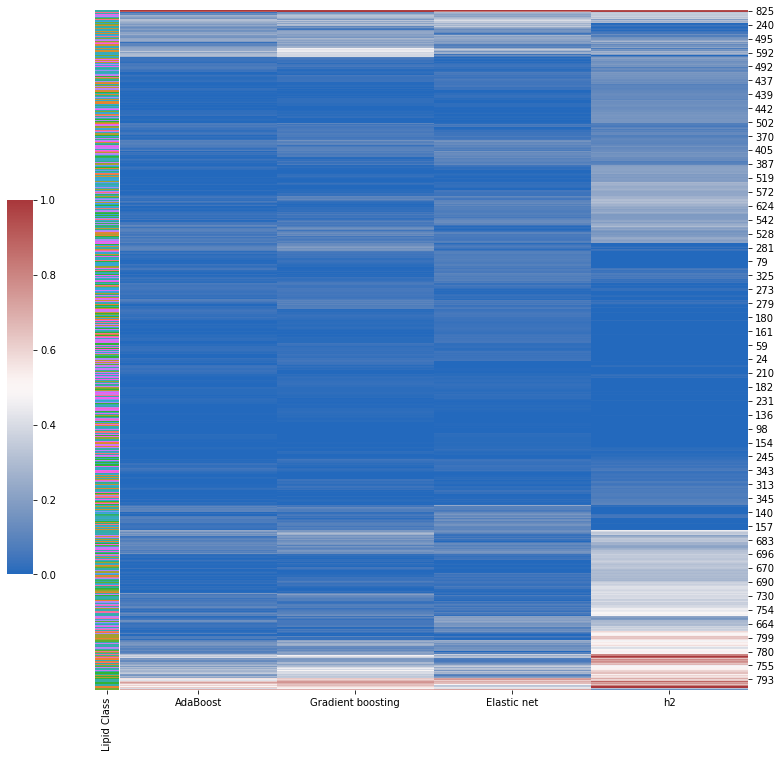

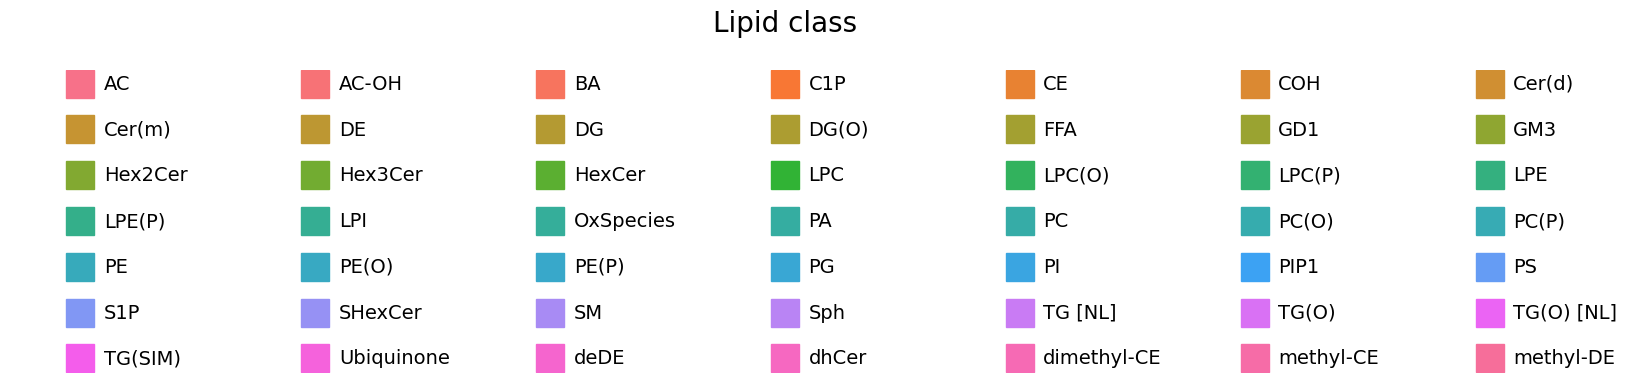

In [37]:
# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df_for_plot['Lipid Class'].map(network_lut)

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print(f'Scaled pearson r2, all lipid species (N={len(df_for_plot)})')

g = sns.clustermap(df_for_plot[cols_plot], cmap="vlag",
                   row_colors=network_colors,
                   figsize=(12, 13),
                   col_cluster=False, standard_scale=1,
                   cbar_pos=(0.1, .2, .03, .4))
g.ax_col_dendrogram.remove()
g.ax_row_dendrogram.remove()

# ################## Plot color vs. lipid class names ##################
df_for_plot['color'] = df_for_plot['Lipid Class'].map(network_lut).values
df_subset_color_no_dup = df_for_plot.drop_duplicates(subset='color')
plt.figure(figsize=(20, 4), dpi=100)
x_val = 1
y = 10
for lip in df_subset_color_no_dup.sort_values(by='Lipid Class')['Lipid Class']:
    plt.plot(x_val, y,
             c=df_subset_color_no_dup[df_subset_color_no_dup['Lipid Class']==lip]['color'].values[0],
             marker='s', markersize=20)
    plt.annotate(text=lip, xy=(x_val+0.1, y-0.12), fontsize=14)
    x_val += 1
    if x_val==8:
        y -= 1
        x_val = 1
plt.title('Lipid class', fontsize=20, y=1.1)
plt.axis('off')

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)


(0.8, 5.2, 5.8, 10.2)

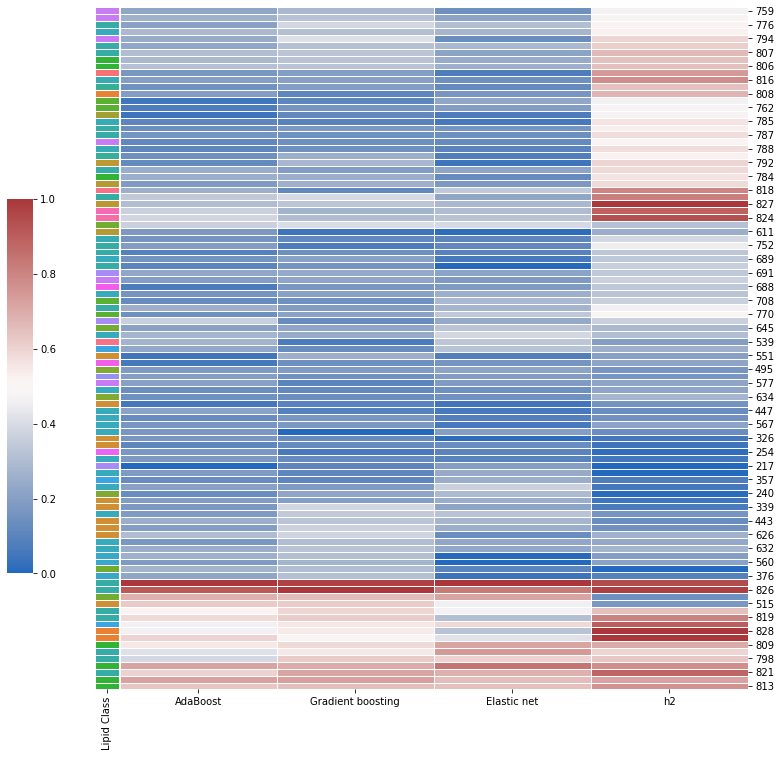

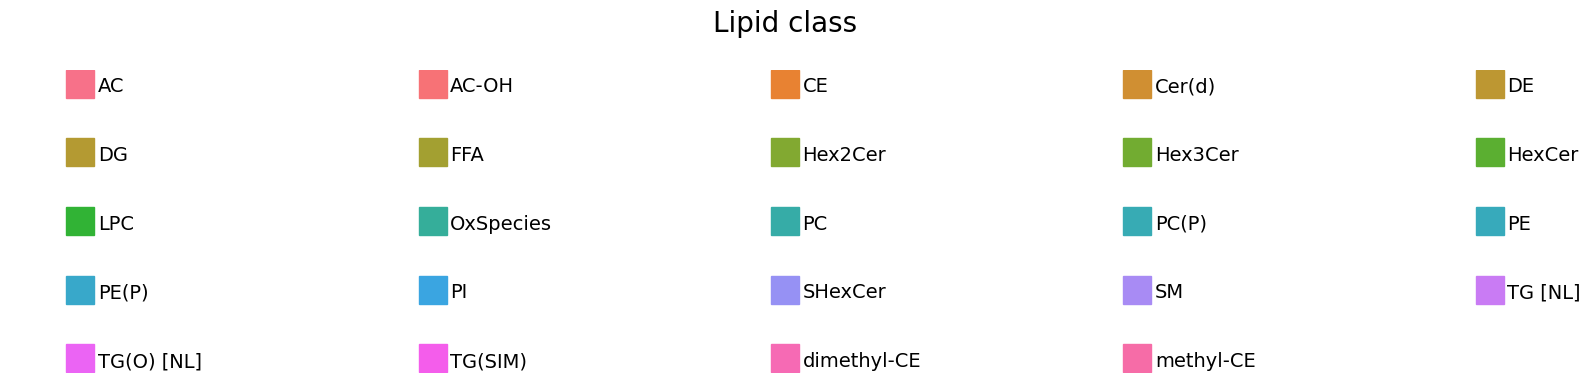

In [29]:
df_subset = df_for_plot[r2_mask].copy()
# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df_subset['Lipid Class'].map(network_lut)

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print(f'Scaled pearson r2, lipid species with any pearson r2>0.05 (N={len(df_subset)})')

g = sns.clustermap(df_subset[cols_plot], cmap="vlag",
                   row_colors=network_colors,
                   linewidths=.5, figsize=(12, 13),
                   col_cluster=False, standard_scale=1,
                   cbar_pos=(0.1, .2, .03, .4))
g.ax_col_dendrogram.remove()
g.ax_row_dendrogram.remove()

# ################## Plot color vs. lipid class names ##################
df_subset['color'] = df_subset['Lipid Class'].map(network_lut).values
df_subset_color_no_dup = df_subset.drop_duplicates(subset='color')
plt.figure(figsize=(20, 4), dpi=100)
x_val = 1
y = 10
for lip in df_subset_color_no_dup.sort_values(by='Lipid Class')['Lipid Class']:
    plt.plot(x_val, y,
             c=df_subset_color_no_dup[df_subset_color_no_dup['Lipid Class']==lip]['color'].values[0],
             marker='s', markersize=20)
    plt.annotate(text=lip, xy=(x_val+0.05, y-0.12), fontsize=14)
    x_val += 1
    if x_val==6:
        y -= 1
        x_val = 1
plt.title('Lipid class', fontsize=20, y=1.1)
plt.axis('off')